# **Exploração, Análise e Preparação dos Dados: Projeto de Previsão de Doença Cardíaca**

In [17]:
import numpy as np
import pandas as pd

## Banco de dados "heart.csv"


## descrição das variáveis

Age: Refere-se a idade do(a) Paciente

Sex: indica o sexo do paciente M(masculinio) F(feminino)

ChestPainType: refere-se ao tipo de dor no peito (TA: Angina tipica, ATA: Angina atipica, NAP: Dor não anginal
                ASY: Assintomático.
                
RestingBP: Pressão sanguínea em repouso em mmHg

Cholesterol: Colesterol seríco em mm/dl

FastingBS: açúcar no sangue em jejum (mg/dl) 0: Fasting BS < 120 mg/dl (não diabético) 1: Fasting BS >= 120 mg/dl, (diabético)

RestingECG: resultados de eletrocardiogramas em repouso (Normal: Normal, ST: tendo ondas ST-T  anormais    LVH: mostrando provável ou hipertrofia ventricular esquerda.  

MaxHR: maxímo de batimentos cardiacos alcançados (valores númericos  entre 60 e 202)

ExerciseAngina: Angina induzida por exercícios - variável Dummie (Y: Sim, N: Não)

Oldpeak: oldpeak = ST (valor númerico medido na depressão gráfica)

ST_Slope: the slope of the peak exercise ST segment (Up, Flat, Down)

HeartDisease: Doença cardíaca (0=Não possui doença cardíaca; 1=Possui doença cardíaca)



In [387]:
# Carrega Banco de Dados
dados = pd.read_csv(r'\heart.csv', sep=',')


## Análise dos Dados

In [393]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [395]:
dados.shape

(918, 12)

In [391]:
dados.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


## Variáveis

### Idade

In [137]:
# contagem da idade decrescente
dados['Age'].value_counts().sort_index()

Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64

In [165]:
import seaborn as sns

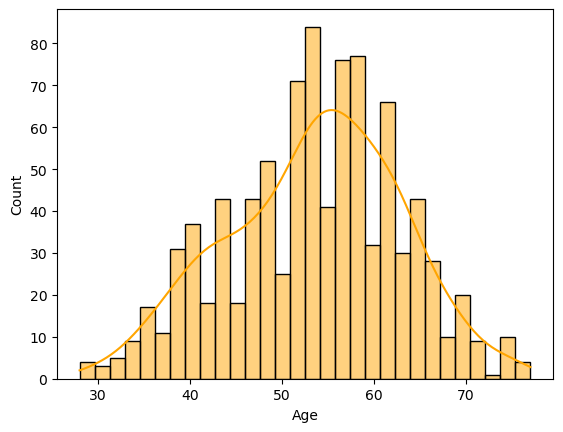

In [167]:
# Idade é um variável númerica recomenda-se o plot de seu histograma
sns.histplot(dados, x='Age', bins=30, color="orange", kde=True, stat="count");

### Sexo - contagem do número de Paciente do sexo masculino e feminino

In [184]:
dados['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

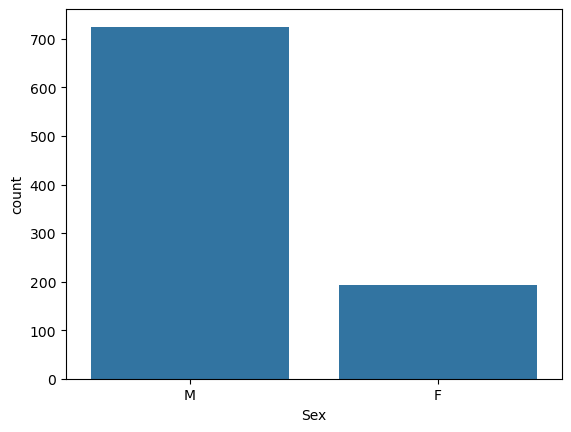

In [192]:
sns.countplot(x='Sex', data=dados);

### tipo de dor no peito

In [199]:
dados['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

### pressão sanguínea em repouso em mmHg(sistólica)

In [205]:
dados.RestingBP.value_counts().sort_index()

RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64

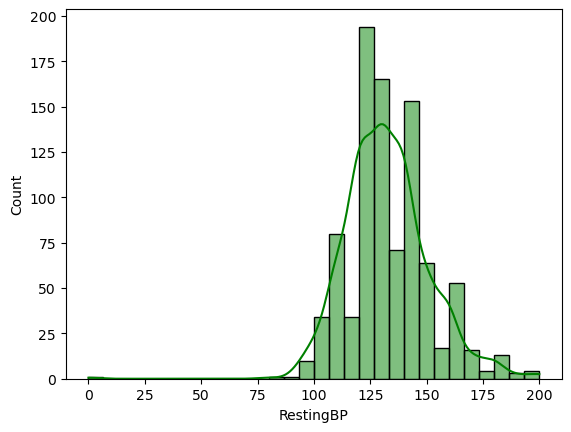

In [208]:
sns.histplot(dados, x='RestingBP', bins=30, color="green", kde=True, stat="count");

## colesterol sérico (mg/dl)

In [218]:
dados.Cholesterol.value_counts().sort_index()

Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64

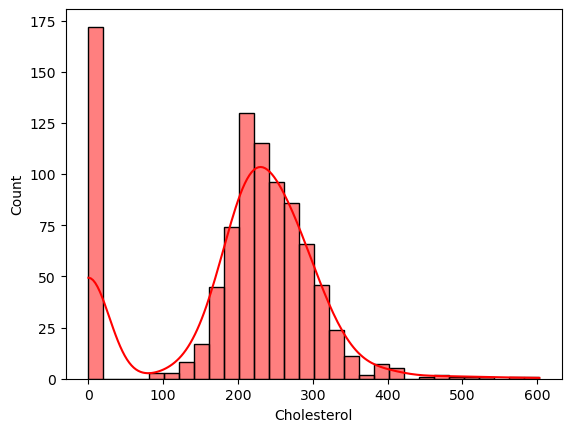

In [239]:
sns.histplot(dados, x = 'Cholesterol', bins = 30, color = "red", kde=True, stat="count");

###  açúcar no sangue em jejum (mg/dl

In [250]:
# 0 não diabético, 1 diábético
dados.FastingBS.value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

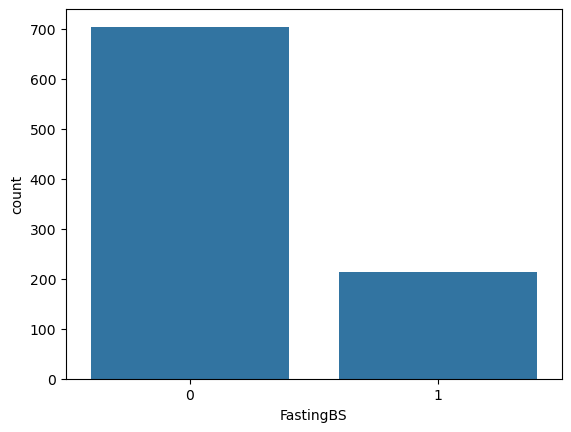

In [261]:
sns.countplot(x='FastingBS', data = dados);

###  eletrocardiograma em repouso

In [271]:
# Normal: Normal LVH: Hipertrofia ventricular esquerda ST: Anormalidade da onda ST-T
dados.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

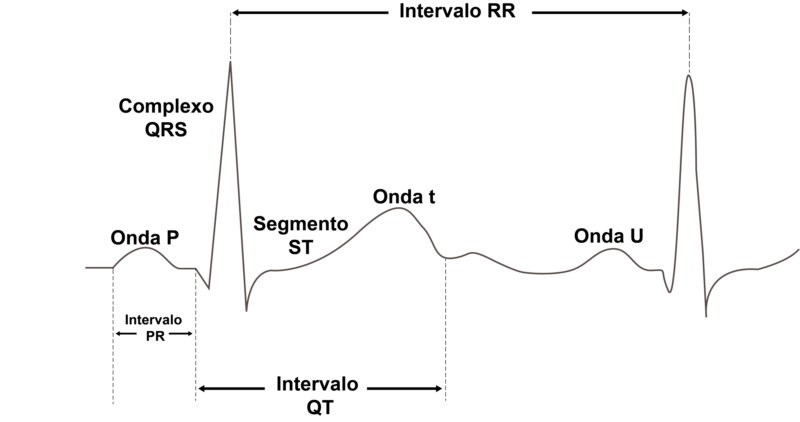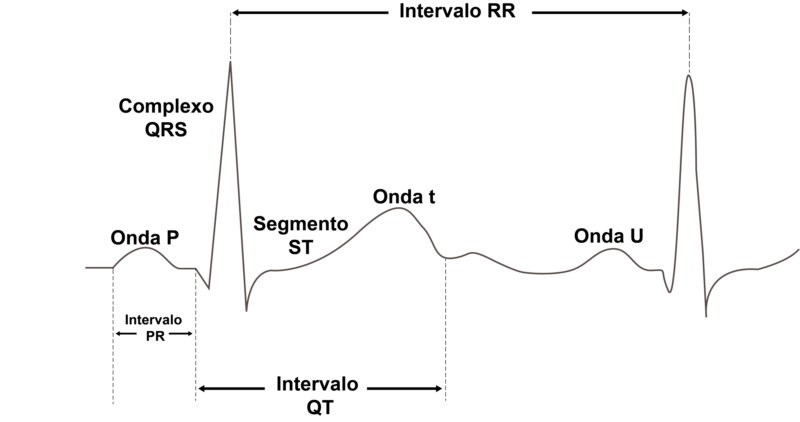

**SEGMENTO ST:** Qualquer desnível do
segmento ST, para cima (supradesnível) ou para baixo
(infradesnível), deve ser avaliado pois pode corresponder a um
infarto agudo do miocárdio.

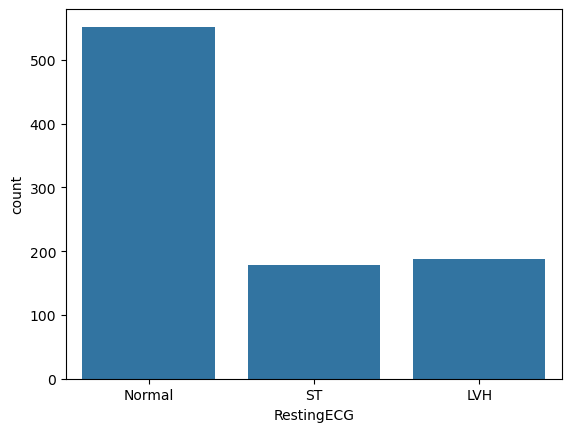

In [291]:
sns.countplot(x='RestingECG', data=dados);

### frequência cardíaca máxima

In [300]:
dados['MaxHR'].value_counts()

MaxHR
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: count, Length: 119, dtype: int64

<Axes: xlabel='MaxHR', ylabel='Count'>

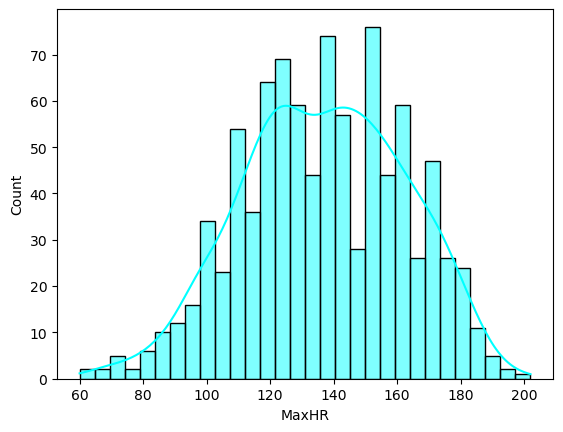

In [302]:
sns.histplot(dados,x='MaxHR', bins = 30, color="cyan", kde = True, stat = "count") 

### Angina induzida por exercício

In [309]:
dados['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

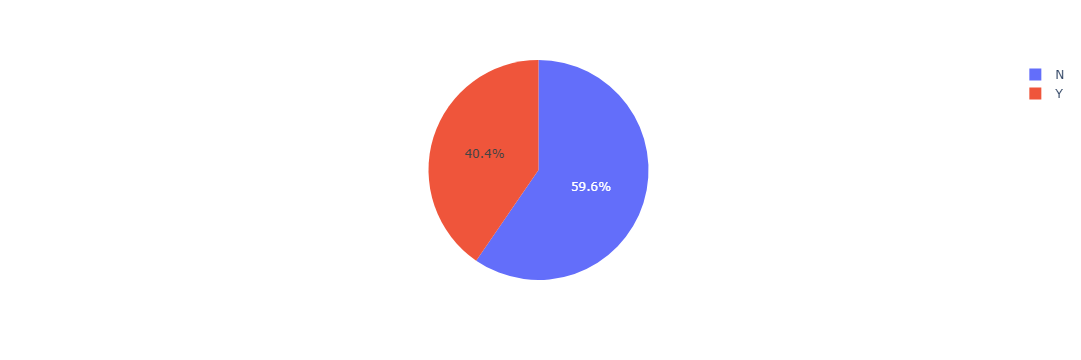

In [314]:
# variável categorícas do tipo Dummie recomenda-se um gráfico de setor.
px.pie(dados, 'ExerciseAngina') 

### **Old Peak = Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso**

In [320]:
dados['Oldpeak'].value_counts()

Oldpeak
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: count, dtype: int64

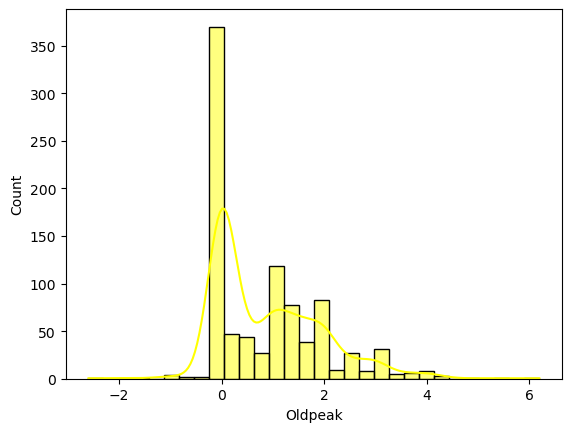

In [325]:
sns.histplot(dados, x='Oldpeak', bins=30, color="yellow", kde=True, stat="count");

### **ST_Slope = Inclinação do segmento ST no ECG**

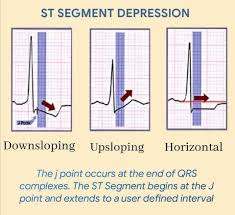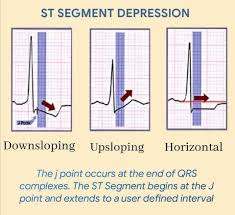

In [333]:
# Flat = plano, Up = para, cima Down = para baixo 
dados['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

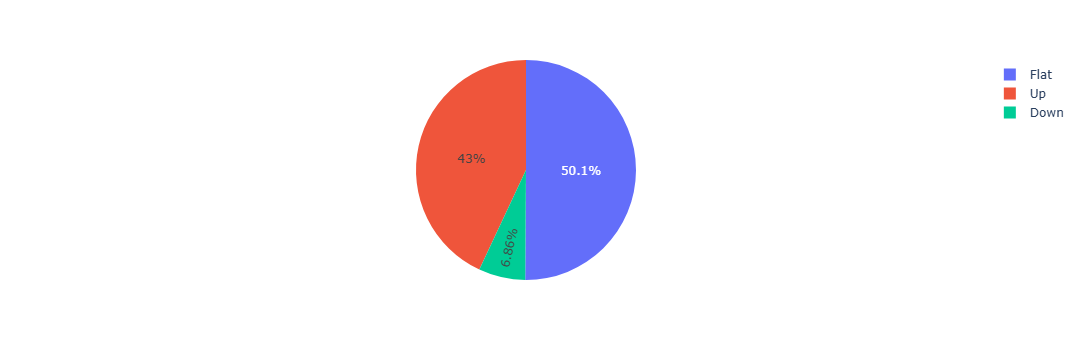

In [336]:
# dados categoricos
px.pie(dados, 'ST_Slope') 

### Doença cardíaca

In [342]:
# 0 = Não possui doença cardíaca, 1 = Possui doença cardíaca
dados['HeartDisease'].value_counts()



HeartDisease
1    508
0    410
Name: count, dtype: int64

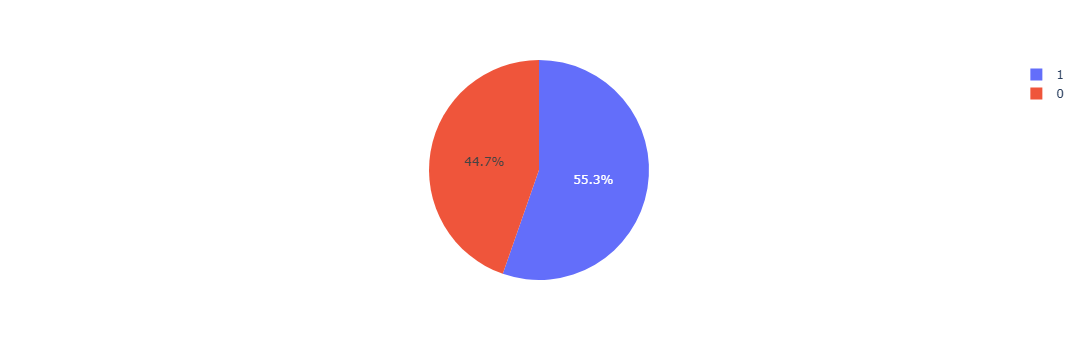

In [345]:
# dados Categoricos 
px.pie(dados, 'HeartDisease')

## *Tratamento dos dados*

In [397]:
# Verificando os tipos de dados presentes
dados.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# Verificando valores faltantes

In [399]:
dados.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [410]:
# excluindo valores faltantes
dados2 = dados.dropna()

In [412]:
dados2.shape

(918, 12)

In [416]:
# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2['Age'] = dados2['Age'].fillna(dados2['Age'].mean())


In [420]:
# SUBSTITUIR OS VALORES MISSING POR QUALQUER OUTRO VALOR
dados2['Age'] = dados2['Age'].fillna(10)


## **Análises Estatísticas Descritivas**

In [425]:
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [428]:
dados.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


### **Tratando Valores Incoerentes**

**Excluindo registro com pressão zero**

In [442]:
dados2 = dados.loc[dados.RestingBP != 0] 

In [445]:
dados2.shape

(917, 12)

In [448]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Substituindo valores zeros do Colesterol pela média sem os zeros**

In [455]:
dados2.Cholesterol.mean()

199.0163576881134

In [464]:
# Substituindo 0 por NaN de forma segura
dados2.loc[:, 'Cholesterol'] = dados2['Cholesterol'].replace(0, np.NaN)

In [474]:
dados2.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [477]:
dados2.Cholesterol.mean()

244.6353887399464

In [486]:
# Substituindo os valores missing pela média de forma segura usando .loc[]
dados2.loc[:, 'Cholesterol'] = dados2['Cholesterol'].fillna(dados2['Cholesterol'].mean())


In [489]:
dados2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [492]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [495]:
dados2.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,244.635389,0,Normal,150,N,0.0,Flat,1


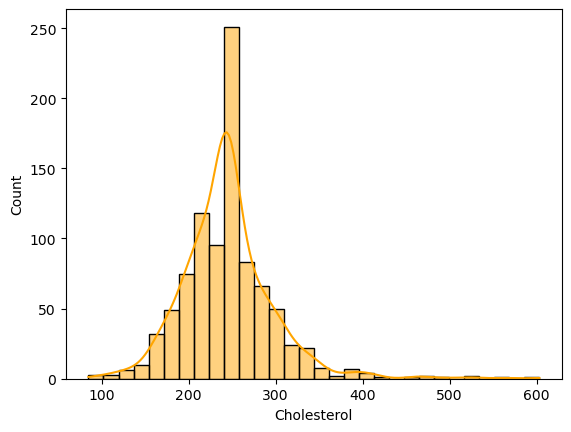

In [498]:
sns.histplot(dados2, x='Cholesterol', bins=30, color="orange", kde=True, stat="count");

### **Análise de Outliers** 

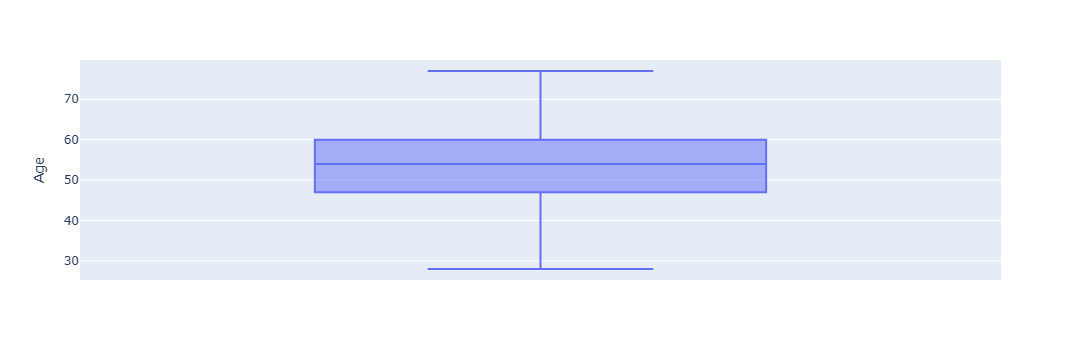

In [505]:
# Idade
px.box(dados2, y='Age')

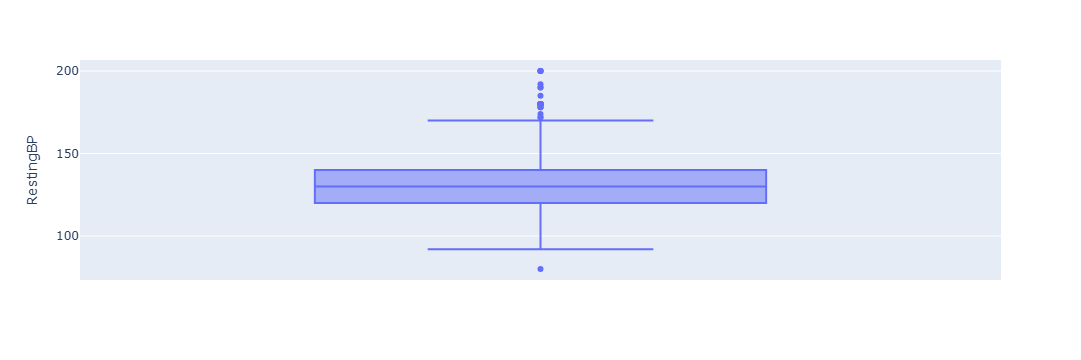

In [508]:
# Pressão Sanguínea em Repouso
px.box(dados2, y='RestingBP')

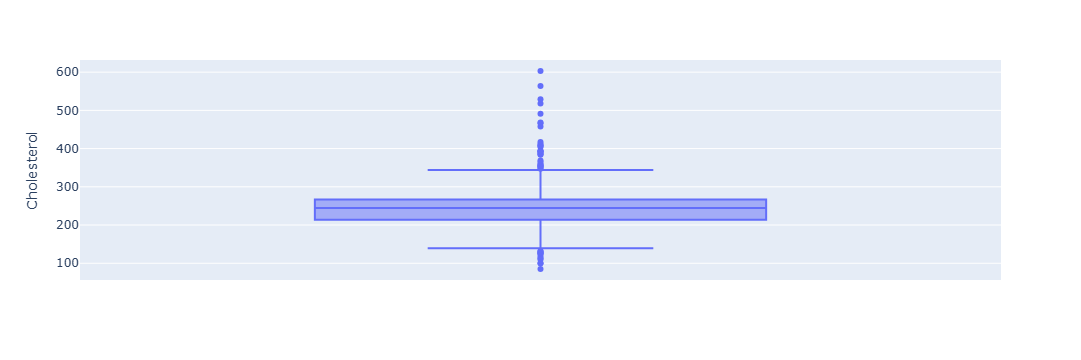

In [511]:
# Colesterol
px.box(dados2, y='Cholesterol')

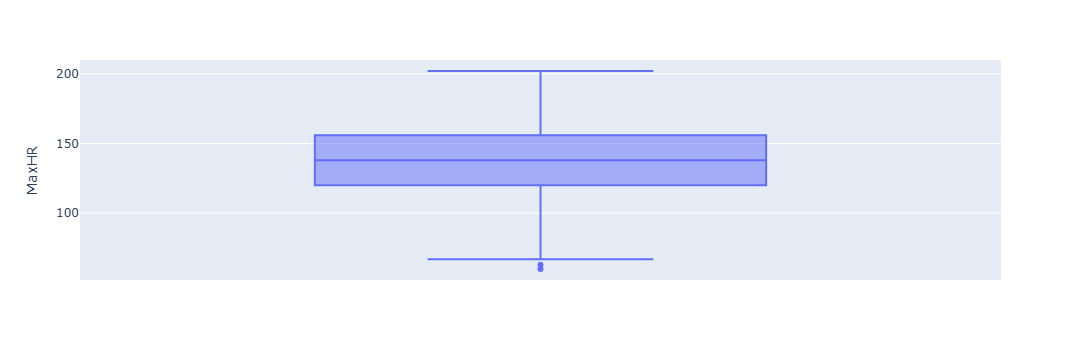

In [514]:
# Frequência Cardíaca Máxima
px.box(dados2, y='MaxHR')

## **Salvando (Exportando) o Dataframe Tratado**

In [525]:
# nossos dados foram tratados e podem ser exportados para um novo arquivo .csv para ser manipulado na proxima etapa
dados2.to_csv('heart_tratado.csv', sep=';', encoding='utf-8', index = False)